## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm

**Loading in Data**

In [2]:
pd.set_option('display.max_columns', 100)
data = pd.read_csv("UFC.csv")
data.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),...,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_CatchWeight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_LightHeavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_OpenWeight,weight_class_Welterweight,weight_class_WomenBantamweight,weight_class_WomenFeatherweight,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,0.00,0.0,50.0000,20.0000,84.000000,45.00000,76.5000,41.000,114.00000,64.000000,1.500,1.00,9.000000,6.500,39.5000,11.000000,63.000000,27.500000,7.5000,7.000000,12.0000,9.0000,3.000,2.000,9.000000,8.5000,35.0000,12.5,43.500000,17.5000,10.5000,4.5000,4.0000,3.0000,4.5000,3.000,36.500,24.50,34.000000,277.5000,...,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135.0,31.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,0.00,0.0,65.5000,35.0000,50.000000,16.50000,113.5000,68.500,68.50000,29.000000,2.500,1.50,0.500000,0.500,46.0000,20.000000,36.000000,7.500000,12.0000,8.000000,8.0000,3.0000,7.500,7.000,6.000000,6.0000,58.0000,30.0,48.000000,15.5000,0.5000,0.5000,0.5000,0.5000,7.0000,4.500,1.500,0.50,219.500000,24.5000,...,12.281250,9.062500,0.843750,0.343750,176.156250,154.687500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,182.88,187.96,185.0,32.0,28.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,0.0,66.5000,29.6875,64.312305,27.34375,89.7500,48.000,85.53125,44.411522,2.000,0.75,2.054688,0.750,51.1875,18.335938,49.612305,16.280411,7.5000,5.076477,7.5000,5.0000,4.500,3.625,4.984375,3.9375,48.6875,17.0,47.115723,16.5000,5.7500,3.7500,5.3125,3.4375,5.0625,3.500,3.875,2.50,99.211914,94.1250,...,2.031250,1.531250,6.031250,4.937500,82.453125,89.781250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,187.96,190.50,264.0,32.0,28.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,0.0,66.5000,29.6875,64.312305,27.34375,89.7500,48.000,85.53125,44.411522,2.000,0.75,2.054688,0.750,51.1875,18.335938,49.612305,16.280411,7.5000,5.076477,7.5000,5.0000,4.500,3.625,4.984375,3.9375,48.6875,17.0,47.115723,16.5000,5.7500,3.7500,5.3125,3.4375,5.0625,

**Exploring Data**

In [44]:
print(data['Winner'].value_counts())
print(data.info())
print(data.isna().any())


Red     3979
Blue    1923
Name: Winner, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(106), int64(52), object(1)
memory usage: 7.2+ MB
None
Winner                  False
title_bout              False
B_avg_KD                False
B_avg_opp_KD            False
B_avg_SIG_STR_pct       False
                        ...  
R_Stance_Open Stance    False
R_Stance_Orthodox       False
R_Stance_Sideways       False
R_Stance_Southpaw       False
R_Stance_Switch         False
Length: 160, dtype: bool


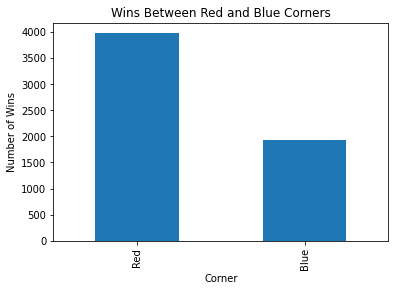

In [4]:
ax1 = data['Winner'].value_counts().plot(kind= 'bar')
ax1.set_title("Wins Between Red and Blue Corners")
ax1.set_xlabel("Corner")
ax1.set_ylabel("Number of Wins")

plt.show()

Text(0.5, 0, 'Corner Color')

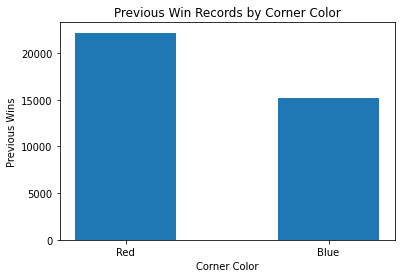

In [45]:
redWins = sum(data['R_wins'])
#print(redWins)

blueWins = sum(data['B_wins'])
#print(blueWins)

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.bar(['Red', 'Blue'], [redWins, blueWins], width= 0.5)
ax1.set_title("Previous Win Records by Corner Color")
ax1.set_ylabel('Previous Wins')
ax1.set_xlabel('Corner Color')

Text(0.5, 0, 'Corner Color')

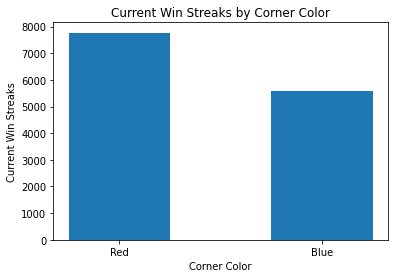

In [46]:
redWinstreak = sum(data['R_current_win_streak'])
#print(redWinstreak)

blueWinstreak = sum(data['B_current_win_streak'])
#print(blueWinstreak)

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.bar(['Red', 'Blue'], [redWinstreak, blueWinstreak], width= 0.5)
ax1.set_title("Current Win Streaks by Corner Color")
ax1.set_ylabel('Current Win Streaks')
ax1.set_xlabel('Corner Color')

**Cleaning Data**

In [47]:
total = data.copy()

ufc = total.copy()
ufc["title_bout"] = ufc["title_bout"].astype(int)

ufc = ufc.replace({"Winner": {"Red": 1, "Blue": 0}})
ufc.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),...,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_CatchWeight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_LightHeavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_OpenWeight,weight_class_Welterweight,weight_class_WomenBantamweight,weight_class_WomenFeatherweight,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,1,0,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,0.00,0.0,50.0000,20.0000,84.000000,45.00000,76.5000,41.000,114.00000,64.000000,1.500,1.00,9.000000,6.500,39.5000,11.000000,63.000000,27.500000,7.5000,7.000000,12.0000,9.0000,3.000,2.000,9.000000,8.5000,35.0000,12.5,43.500000,17.5000,10.5000,4.5000,4.0000,3.0000,4.5000,3.000,36.500,24.50,34.000000,277.5000,...,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135.0,31.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,0.00,0.0,65.5000,35.0000,50.000000,16.50000,113.5000,68.500,68.50000,29.000000,2.500,1.50,0.500000,0.500,46.0000,20.000000,36.000000,7.500000,12.0000,8.000000,8.0000,3.0000,7.500,7.000,6.000000,6.0000,58.0000,30.0,48.000000,15.5000,0.5000,0.5000,0.5000,0.5000,7.0000,4.500,1.500,0.50,219.500000,24.5000,...,12.281250,9.062500,0.843750,0.343750,176.156250,154.687500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,182.88,187.96,185.0,32.0,28.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,0.0,66.5000,29.6875,64.312305,27.34375,89.7500,48.000,85.53125,44.411522,2.000,0.75,2.054688,0.750,51.1875,18.335938,49.612305,16.280411,7.5000,5.076477,7.5000,5.0000,4.500,3.625,4.984375,3.9375,48.6875,17.0,47.115723,16.5000,5.7500,3.7500,5.3125,3.4375,5.0625,3.500,3.875,2.50,99.211914,94.1250,...,2.031250,1.531250,6.031250,4.937500,82.453125,89.781250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,187.96,190.50,264.0,32.0,28.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,0.0,66.5000,29.6875,64.312305,27.34375,89.7500,48.000,85.53125,44.411522,2.000,0.75,2.054688,0.750,51.1875,18.335938,49.612305,16.280411,7.5000,5.076477,7.5000,5.0000,4.500,3.625,4.984375,3.9375,48.6875,17.0,47.115723,16.5000,5.7500,3.7500,5.3125,3.4375,5.0625,3.500,3.875,2.50,99.21191

**Splitting Train and Test Sets**

In [48]:
x = ufc.iloc[:,1:]
y = ufc.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Establishing Baseline**

In [49]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(x_train,y_train)
baseline_acc = dummy_classifier.score(x_test,y_test)

print("Baseline accuracy = ", baseline_acc)

Baseline accuracy =  0.6706181202370872


**Logistic Regression Model**

In [8]:
logReg = LogisticRegression(random_state= 42, max_iter= 9999)
logReg.fit(x_train, y_train)
predictLog = logReg.predict(x_test)

accuracyLog = accuracy_score(y_test, predictLog)
print("Accuracy = ", accuracyLog)

Accuracy =  0.6816257408975445


In [ ]:
# NOTE: this data could not be cross validated due to the sample size being too large resulting in exceeding the iteration limit
cvLog = cross_val_score(logReg, x, y, cv= 10)
print("Cross Validation Score = ", cvLog)

**Support Vector Machines**

In [36]:
modelSVM = svm.SVC(C=1, kernel='rbf', probability= True)
modelSVM.fit(x_train, y_train)

accuracySVM = modelSVM.score(x_train, y_train)
print("Accuracy: ", accuracySVM)

Accuracy:  0.6750688413471722


In [50]:
cvSVM = np.average(cross_val_score(modelSVM, x, y, cv= 10))
print("Cross Validation Score = ", cvSVM)

Cross Validation Score =  0.6741784966589234


**Bagging**

In [37]:
modelBag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators= 10, random_state= 42)
modelBag.fit(x_train, y_train)
predictBag = modelBag.predict(x_test)

accuracyBag = accuracy_score(y_test, predictBag)
print("Accuracy = ", accuracyBag)

Accuracy =  0.6359017781541066


In [51]:
cvBag = np.average(cross_val_score(modelBag, x, y, cv= 10))
print("Cross Validation Score = ", cvBag)

Cross Validation Score =  0.6065892339900771


**Random Forest**

In [40]:
modelRF = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
modelRF.fit(x_train, y_train)
predictRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictRF)
print("Accuracy = ", accuracyRF)

Accuracy =  0.6816257408975445


In [ ]:
cvRF = np.average(cross_val_score(modelRF, x, y, cv= 10))
print("Cross Validation Score = ", cvRF)

Cross Validation Score =  0.6660520806446988


                      Features  Importance
134                      R_age    0.017507
65                 B_Reach_cms    0.015534
133                      B_age    0.014268
131                R_Reach_cms    0.012946
64                B_Height_cms    0.012899
36       B_avg_DISTANCE_landed    0.012458
70       R_avg_opp_SIG_STR_pct    0.011952
92       R_avg_opp_HEAD_landed    0.011903
104  R_avg_opp_DISTANCE_landed    0.011208
80    R_avg_opp_SIG_STR_landed    0.011129


Text(0.5, 1.0, 'Top RandomForest Features')

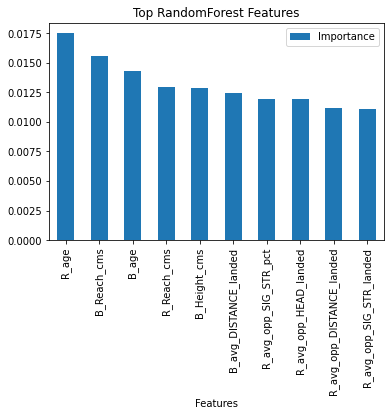

In [53]:
feature_importances = modelRF.feature_importances_
features = x_train.columns
df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
df = df.sort_values(by='Importance', ascending=False)

df1 = df.iloc[0:10, :]
print(df1)

ax1 = df1.plot.bar(x= 'Features', y= 'Importance')
ax1.set_title('Top RandomForest Features')

**AdaBoost**

In [38]:
base_est = DecisionTreeClassifier(max_depth=4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(x_train, y_train)

accuracyADA = accuracy_score(y_test, ada_boost.predict(x_test))
print("Accuracy = ", accuracyADA)

Accuracy =  0.6528365791701948


In [ ]:
cvADA = np.average(cross_val_score(ada_boost, x, y, cv= 10))
print("Cross Validation Score = ", cvADA)

Cross Validation Score =  0.6523307235653445


[8.35349455e-04 8.79821713e-03 3.32078039e-03 1.57684982e-02
 3.31111040e-02 5.78587534e-03 1.27046037e-02 5.96954800e-03
 6.69090208e-03 3.33258904e-03 1.12693352e-03 1.06208274e-02
 3.90967478e-03 1.93735081e-03 2.35163983e-03 2.71747990e-03
 5.22281996e-03 3.80969274e-03 1.21582487e-02 1.37090986e-02
 1.09311850e-02 1.25556860e-02 4.40540428e-03 6.19741620e-03
 1.02906032e-02 3.60103016e-03 3.49073503e-03 1.70695303e-02
 3.08926941e-03 2.26701416e-03 7.44358148e-03 6.23670127e-03
 1.60466923e-02 5.54225053e-03 2.30405960e-03 6.72245404e-03
 1.23505275e-02 1.05804177e-03 1.20283769e-02 4.94926884e-03
 3.12103662e-03 5.65900298e-03 4.42029229e-03 4.32908713e-03
 5.97129491e-03 1.00077234e-02 1.34219728e-03 9.16269640e-03
 1.93561064e-03 5.77388108e-03 2.70119137e-03 3.21106498e-03
 6.12932187e-04 3.28997277e-03 1.47929290e-03 3.15130190e-04
 1.22640540e-03 0.00000000e+00 0.00000000e+00 9.29687823e-07
 3.91062720e-10 1.38681865e-03 4.20563319e-04 5.73592892e-09
 4.94872398e-03 2.279582

Text(0.5, 1.0, 'Top AdaBoost Features')

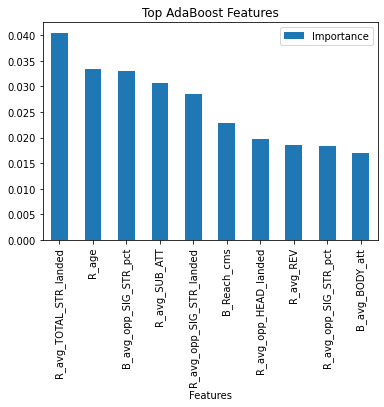

In [52]:
feature_importances = ada_boost.feature_importances_
print(feature_importances)
features = x_train.columns
df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
df = df.sort_values(by='Importance', ascending=False)

df1 = df.iloc[0:10, :]
print(df1)

ax1 = df1.plot.bar(x= 'Features', y= 'Importance')
ax1.set_title('Top AdaBoost Features')

**Voting**

In [41]:
modelVote = VotingClassifier(estimators = [('rf', modelRF), ('svm', modelSVM), ('log', logReg), ('ada', ada_boost)], voting='soft') 

modelVote.fit(x_train, y_train)
votePred = modelVote.predict(x_test)

accuracyVoting = accuracy_score(y_test, votePred)
print("Accuracy = ", accuracyVoting)

Accuracy =  0.6875529212531752


In [ ]:
# NOTE: this data could not be cross validated due to the sample size being too large resulting in exceeding the iteration limit
cvVote = np.average(cross_val_score(modelVote, x, y, cv= 10))
print("Cross Validation Score = ", cvVote)

**Conclusions**

Text(0.5, 0, 'Model')

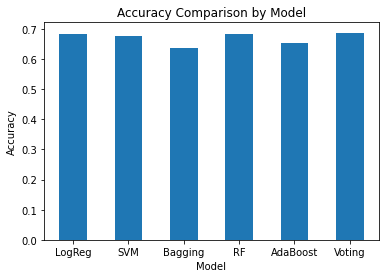

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.bar(['LogReg', 'SVM', 'Bagging', 'RF', 'AdaBoost', 'Voting'], [accuracyLog, accuracySVM, accuracyBag, accuracyRF, accuracyADA, accuracyVoting], width= 0.5)
ax1.set_title("Accuracy Comparison by Model")
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Model')